# Fit Norm Sum
Tutorial for normalized sum of two functions
Here: a background exponential and a crystalball function
Parameters can be set:
 1.   with the TF1 object before adding the function (for 3) and 4))
 2.  with the TF1NormSum object (first two are the coefficients, then the non constant parameters)
 3. with the TF1 object after adding the function

Sum can be constructed by:
 1. by a string containing the names of the functions and/or the coefficient in front
 2. by a string containg formulas like expo, gaus...
 3. by the list of functions and coefficients (which are 1 by default)
 4. by a std::vector for functions and coefficients




**Author:** Lorenzo Moneta  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:30 AM.</small></i>

In [1]:
%%cpp -d
#include <TMath.h>
#include <TCanvas.h>
#include <TF1NormSum.h>
#include <TF1.h>
#include <TH1.h>


using namespace std;

In [2]:
const int nsig = 5.E4;
const int nbkg = 1.e6;
Int_t NEvents = nsig+nbkg;
Int_t NBins   = 1e3;

double signal_mean = 3;
TF1 *f_cb    = new TF1("MyCrystalBall","crystalball",-5.,5.);
TF1 *f_exp   = new TF1("MyExponential","expo",-5.,5.);

I.:

In [3]:
f_exp-> SetParameters(1.,-0.3);
f_cb -> SetParameters(1,signal_mean,0.3,2,1.5);

Construction of the tf1normsum object ........................................
 1) :

In [4]:
TF1NormSum *fnorm_exp_cb = new TF1NormSum(f_cb,f_exp,nsig,nbkg);

4) :

In [5]:
TF1   * f_sum = new TF1("fsum", *fnorm_exp_cb, -5., 5., fnorm_exp_cb->GetNpar());
f_sum->Draw();

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Iii.:

In [6]:
f_sum->SetParameters( fnorm_exp_cb->GetParameters().data() );
f_sum->SetParName(1,"NBackground");
f_sum->SetParName(0,"NSignal");
for (int i = 2; i < f_sum->GetNpar(); ++i)
   f_sum->SetParName(i,fnorm_exp_cb->GetParName(i) );

Generate histogram to fit ..............................................................

In [7]:
TStopwatch w;
w.Start();
TH1D *h_sum = new TH1D("h_ExpCB", "Exponential Bkg + CrystalBall function", NBins, -5., 5.);
for (int i=0; i<NEvents; i++)
{
   h_sum -> Fill(f_sum -> GetRandom());
}
printf("Time to generate %d events:  ",NEvents);
w.Print();

Time to generate 1050000 events:  Real time 0:00:00, CP time 0.150


Th1f *h_orig = new th1f(*h_sum);

Need to scale histogram with width since we are fitting a density

In [8]:
h_sum -> Sumw2();
h_sum -> Scale(1., "width");

Fit - use minuit2 if available

In [9]:
ROOT::Math::MinimizerOptions::SetDefaultMinimizer("Minuit2");
new TCanvas("Fit","Fit",800,1000);

Do a least-square fit of the spectrum

In [10]:
auto result = h_sum -> Fit("fsum","SQ");
result->Print();
h_sum -> Draw();
printf("Time to fit using ROOT TF1Normsum: ");
w.Print();


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1021.04
NDf                       =          993
Edm                       =  8.20994e-06
NCalls                    =          233
NSignal                   =        50083   +/-   1235.87     
NBackground               =       998896   +/-   1573.51     
Mean                      =      2.99897   +/-   0.00224467  
Sigma                     =     0.297886   +/-   0.00230899  
Alpha                     =      2.12449   +/-   0.140023    
N                         =      1.15624   +/-   0.474844    
Slope                     =    -0.300343   +/-   0.000644416 
Time to fit using ROOT TF1Normsum: Real time 0:00:00, CP time 0.150


Test if parameters are fine

In [11]:
std::vector<double>  pref = {nsig, nbkg, signal_mean};
for (unsigned int i = 0; i< pref.size(); ++i)  {
   if (!TMath::AreEqualAbs(pref[i], f_sum->GetParameter(i), f_sum->GetParError(i)*10.) )
      Error("testFitNormSum","Difference found in fitted %s - difference is %g sigma",f_sum->GetParName(i), (f_sum->GetParameter(i)-pref[i])/f_sum->GetParError(i));
}

gStyle->SetOptStat(0);

Add parameters

In [12]:
auto t1 = new TLatex(-2.5, 300000, TString::Format("%s = %8.0f #pm %4.0f", "NSignal",f_sum->GetParameter(0), f_sum->GetParError(0) ) );
auto t2 = new TLatex(-2.5, 270000, TString::Format("%s = %8.0f #pm %4.0f", "Nbackgr",f_sum->GetParameter(1), f_sum->GetParError(1) ) );
t1->Draw();
t2->Draw();

Draw all canvases 

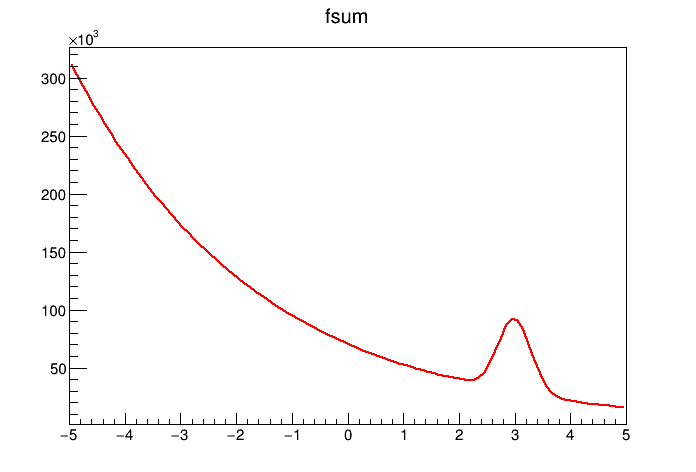

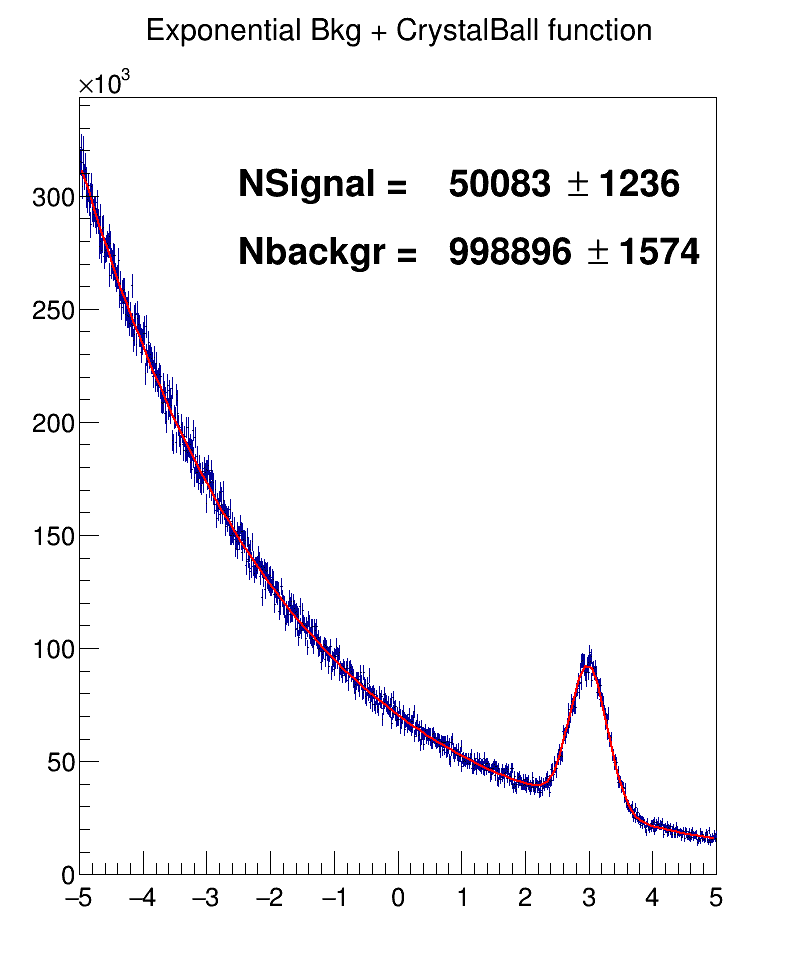

In [13]:
gROOT->GetListOfCanvases()->Draw()